In [7]:
import numpy as np

# Hello World for a computational physicist: simulate a simple harmonic oscillator
t = np.linspace(0, 10, 100)  # time array
omega = 2 * np.pi            # angular frequency
x0 = 1                       # initial amplitude

x = x0 * np.cos(omega * t)   # position as a function of time

print("Hello, Computational Physics World!")
print("Sample positions:", x[:5])

Hello, Computational Physics World!
Sample positions: [ 1.          0.80527026  0.29692038 -0.32706796 -0.82367658]


In [8]:
import numpy as np

# Hello World for a computational physicist: simulate a simple harmonic oscillator
t = np.linspace(0, 10, 100)  # time array
omega = 2 * np.pi            # angular frequency
x0 = 1                       # initial amplitude

x = x0 * np.cos(omega * t)   # position as a function of time

print("Hello, Computational Physics World!")
print("Sample positions:", x[:5])

Hello, Computational Physics World!
Sample positions: [ 1.          0.80527026  0.29692038 -0.32706796 -0.82367658]


In [1]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Find a root of the equation f(x) = 0 using the Newton-Raphson method.
    
    Parameters:
        f        : function, the equation f(x)
        df       : function, derivative f'(x)
        x0       : initial guess
        tol      : tolerance for convergence
        max_iter : maximum number of iterations
        
    Returns:
        root     : approximated root
        iter     : number of iterations used
    """
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if dfx == 0:
            raise ZeroDivisionError(f"Derivative zero at iteration {i}, x = {x}.")
        
        x_new = x - fx / dfx
        
        if abs(x_new - x) < tol:
            return x_new, i + 1
        
        x = x_new
    
    raise ValueError("Newton-Raphson method did not converge within max iterations.")

# Example: Solve x^3 - x - 2 = 0
f = lambda x: x**3 - x - 2
df = lambda x: 3*x**2 - 1

root, iterations = newton_raphson(f, df, x0=1.5)
print(f"Root: {root:.6f}, Iterations: {iterations}")


Root: 1.521380, Iterations: 3


In [2]:
# newton_raphson.py
# A Python implementation of the Newton-Raphson root-finding method.
# This method uses a linear approximation of a function to iteratively find its root.

import math

def newton_raphson(f, f_prime, x0, tol=1e-7, max_iter=100):
    """
    Finds a root of a function using the Newton-Raphson method.

    Parameters:
    f (function): The function for which to find the root. It should accept a single
                  numerical argument.
    f_prime (function): The derivative of the function f. It should also accept a
                        single numerical argument.
    x0 (float): The initial guess for the root. A good initial guess is critical
                for convergence.
    tol (float): The tolerance for the solution. The method stops when the
                 absolute difference between successive iterations is less than this value.
                 Defaults to 1e-7.
    max_iter (int): The maximum number of iterations to perform. This prevents the
                    algorithm from running indefinitely if it fails to converge.
                    Defaults to 100.

    Returns:
    float: The approximate root of the function.
    None: If the method fails to converge within the maximum number of iterations,
          or if the derivative is too close to zero.
    """
    x = float(x0)
    
    print(f"Starting Newton-Raphson method with initial guess: {x:.5f}")
    
    for i in range(max_iter):
        # Calculate the function value at the current guess.
        f_x = f(x)
        
        # Calculate the derivative value at the current guess.
        f_prime_x = f_prime(x)

        # Check for division by zero, which indicates the tangent line is horizontal.
        if abs(f_prime_x) < 1e-10:
            print(f"Error: Derivative is too close to zero at x = {x:.5f}.")
            print("The method cannot proceed. Try a different initial guess.")
            return None

        # Apply the Newton-Raphson formula: x_new = x - f(x) / f'(x)
        # This formula finds the x-intercept of the tangent line at (x, f(x)).
        delta_x = f_x / f_prime_x
        x = x - delta_x
        
        # Print the progress for debugging and visualization.
        print(f"Iteration {i+1}: Current guess = {x:.5f}, f(x) = {f_x:.5f}")

        # Check for convergence. If the change in x is less than the tolerance,
        # we consider the root found.
        if abs(delta_x) < tol:
            print("\nConvergence achieved.")
            return x

    # If the loop completes without convergence, print a warning.
    print("\nWarning: Maximum number of iterations reached without convergence.")
    print("The method may be diverging or oscillating. The last guess is returned.")
    return x

# --- Example Usage ---

# Problem: Find the square root of a number, N, by finding the root of f(x) = x^2 - N.
# We will find the square root of N = 25.
N = 25

# Define the function f(x) = x^2 - N.
# The root of this function is the value of x where x^2 = N.
def f(x):
    return x**2 - N

# Define the derivative of the function, f'(x) = 2x.
def f_prime(x):
    return 2 * x

# Set the initial guess. A guess of 1.0 is a reasonable starting point.
initial_guess = 1.0

# Call the newton_raphson function with the defined functions and initial guess.
root = newton_raphson(f, f_prime, initial_guess)

# Print the final result.
if root is not None:
    print(f"\nApproximate square root of {N} is: {root:.7f}")
    print(f"Verification: {root:.7f}^2 = {root**2:.7f}")

print("\n--- Another Example: Finding the root of a trigonometric function ---")

# Problem: Find a root of g(x) = cos(x) - x.
# We know from a graph that a root exists near x = 0.7.

def g(x):
    return math.cos(x) - x

def g_prime(x):
    return -math.sin(x) - 1

# Initial guess from visual inspection of the graph.
initial_guess_g = 0.7

root_g = newton_raphson(g, g_prime, initial_guess_g)

if root_g is not None:
    print(f"\nApproximate root of cos(x) - x is: {root_g:.7f}")
    print(f"Verification: cos({root_g:.7f}) - {root_g:.7f} = {g(root_g):.7f}")


Starting Newton-Raphson method with initial guess: 1.00000
Iteration 1: Current guess = 13.00000, f(x) = -24.00000
Iteration 2: Current guess = 7.46154, f(x) = 144.00000
Iteration 3: Current guess = 5.40603, f(x) = 30.67456
Iteration 4: Current guess = 5.01525, f(x) = 4.22513
Iteration 5: Current guess = 5.00002, f(x) = 0.15271
Iteration 6: Current guess = 5.00000, f(x) = 0.00023
Iteration 7: Current guess = 5.00000, f(x) = 0.00000

Convergence achieved.

Approximate square root of 25 is: 5.0000000
Verification: 5.0000000^2 = 25.0000000

--- Another Example: Finding the root of a trigonometric function ---
Starting Newton-Raphson method with initial guess: 0.70000
Iteration 1: Current guess = 0.73944, f(x) = 0.06484
Iteration 2: Current guess = 0.73909, f(x) = -0.00059
Iteration 3: Current guess = 0.73909, f(x) = -0.00000

Convergence achieved.

Approximate root of cos(x) - x is: 0.7390851
Verification: cos(0.7390851) - 0.7390851 = -0.0000000



Example 1: Finding root of x^2 - 2 = 0
Initial guess: x0 = 1.0
------------------------------------------------------------
Iteration    x_n                  f(x_n)               Error          
------------------------------------------------------------
0            1.0000000000         -1.0000000000        0.5000000000   
1            1.5000000000         0.2500000000         0.0833333333   
2            1.4166666667         0.0069444444         0.0024509804   
3            1.4142156863         0.0000060073         0.0000021239   
4            1.4142135624         0.0000000000         0.0000000000   
------------------------------------------------------------

Converged to root: 1.4142135623730951
Number of iterations: 5
Final error: 1.5947243525715749e-12
f(root) = 4.440892098500626e-16

Verification: sqrt(2) = 1.4142135623730951


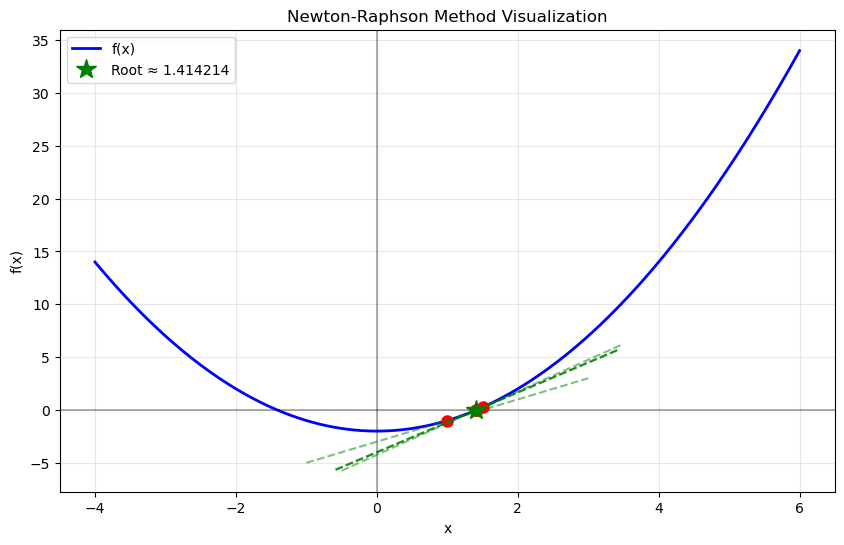


Example 2: Finding root of x^3 - 2x - 5 = 0
Initial guess: x0 = 2.0
------------------------------------------------------------
Iteration    x_n                  f(x_n)               Error          
------------------------------------------------------------
0            2.0000000000         -1.0000000000        0.1000000000   
1            2.1000000000         0.0610000000         0.0054318789   
2            2.0945681211         0.0001857232         0.0000166394   
3            2.0945514817         0.0000000017         0.0000000002   
------------------------------------------------------------

Converged to root: 2.0945514815423265
Number of iterations: 4
Final error: 1.5587264812211288e-10
f(root) = -8.881784197001252e-16


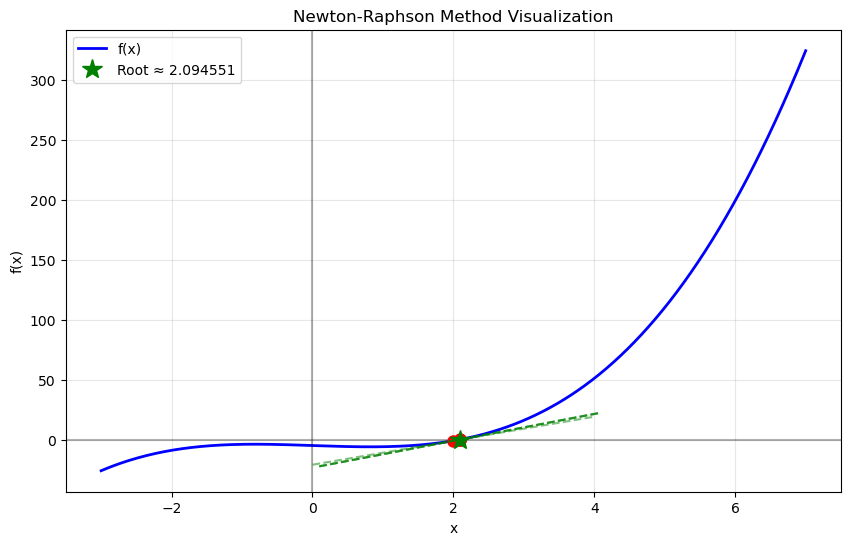


Example 3: Finding root of cos(x) - x = 0
Initial guess: x0 = 0.5
------------------------------------------------------------
Iteration    x_n                  f(x_n)               Error          
------------------------------------------------------------
0            0.5000000000         0.3775825619         0.2552224171   
1            0.7552224171         -0.0271033119        0.0160807510   
2            0.7391416661         -0.0000946154        0.0000565322   
3            0.7390851339         -0.0000000012        0.0000000007   
------------------------------------------------------------

Converged to root: 0.7390851332151607
Number of iterations: 4
Final error: 7.056460971099909e-10
f(root) = 0.0


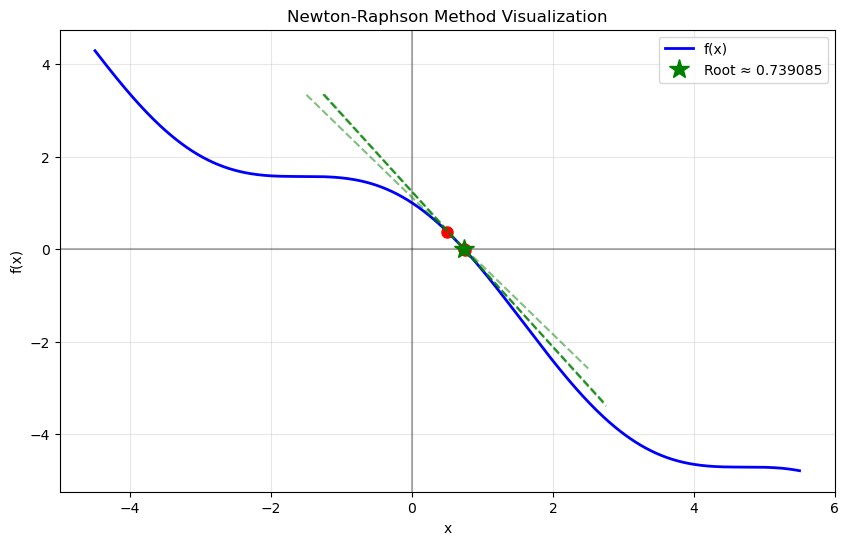


Class-based Example: Finding root of x^3 + x - 1 = 0

Root found: 0.6823278038280194
Convergence rate: inf


C:\Users\siddi\AppData\Local\Temp\ipykernel_12936\2120880195.py:273: RuntimeWarning: divide by zero encountered in log
  rate = np.log(errors[i+1] / errors[i]) / np.log(errors[i] / errors[i-1])


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson(f, df, x0, tolerance=1e-7, max_iterations=100):
    """
    Find the root of an equation using Newton-Raphson method.
    
    Parameters:
    -----------
    f : function
        The function for which we want to find the root
    df : function
        The derivative of the function f
    x0 : float
        Initial guess for the root
    tolerance : float
        Desired accuracy (default: 1e-7)
    max_iterations : int
        Maximum number of iterations (default: 100)
    
    Returns:
    --------
    root : float
        The approximated root
    iterations : int
        Number of iterations performed
    """
    
    x = x0
    iteration = 0
    
    print(f"Initial guess: x0 = {x0}")
    print("-" * 60)
    print(f"{'Iteration':<12} {'x_n':<20} {'f(x_n)':<20} {'Error':<15}")
    print("-" * 60)
    
    while iteration < max_iterations:
        fx = f(x)
        dfx = df(x)
        
        # Check if derivative is zero to avoid division by zero
        if abs(dfx) < 1e-15:
            print(f"\nDerivative is too small at x = {x}")
            print("Method failed - derivative approaching zero")
            return None, iteration
        
        # Newton-Raphson formula: x_{n+1} = x_n - f(x_n)/f'(x_n)
        x_new = x - fx / dfx
        
        # Calculate error
        error = abs(x_new - x)
        
        print(f"{iteration:<12} {x:<20.10f} {fx:<20.10f} {error:<15.10f}")
        
        # Check for convergence
        if error < tolerance:
            print("-" * 60)
            print(f"\nConverged to root: {x_new}")
            print(f"Number of iterations: {iteration + 1}")
            print(f"Final error: {error}")
            print(f"f(root) = {f(x_new)}")
            return x_new, iteration + 1
        
        x = x_new
        iteration += 1
    
    print(f"\nMaximum iterations ({max_iterations}) reached")
    print(f"Current approximation: {x}")
    return x, max_iterations


def plot_newton_raphson(f, df, x0, tolerance=1e-7, max_iterations=10):
    """
    Visualize the Newton-Raphson method iterations.
    """
    # Generate x values for plotting
    x_plot = np.linspace(x0 - 5, x0 + 5, 400)
    y_plot = [f(x) for x in x_plot]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, 'b-', label='f(x)', linewidth=2)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    
    # Perform Newton-Raphson iterations for visualization
    x = x0
    for i in range(min(5, max_iterations)):  # Show first 5 iterations
        fx = f(x)
        dfx = df(x)
        
        if abs(dfx) < 1e-15:
            break
            
        # Plot the point on the curve
        plt.plot(x, fx, 'ro', markersize=8)
        
        # Plot the tangent line
        x_tangent = np.linspace(x - 2, x + 2, 100)
        y_tangent = fx + dfx * (x_tangent - x)
        plt.plot(x_tangent, y_tangent, 'g--', alpha=0.5)
        
        # Calculate next x
        x_new = x - fx / dfx
        
        # Plot vertical line to x-axis
        plt.plot([x_new, x_new], [0, fx + dfx * (x_new - x)], 'r--', alpha=0.5)
        
        # Check convergence
        if abs(x_new - x) < tolerance:
            break
            
        x = x_new
    
    # Mark the final root
    plt.plot(x, f(x), 'g*', markersize=15, label=f'Root ≈ {x:.6f}')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Newton-Raphson Method Visualization')
    plt.legend()
    plt.show()


# Example 1: Find root of x^2 - 2 = 0 (finding square root of 2)
def example1():
    print("\n" + "="*60)
    print("Example 1: Finding root of x^2 - 2 = 0")
    print("="*60)
    
    # Define function and its derivative
    f = lambda x: x**2 - 2
    df = lambda x: 2*x
    
    # Initial guess
    x0 = 1.0
    
    # Find root
    root, iterations = newton_raphson(f, df, x0)
    
    if root is not None:
        print(f"\nVerification: sqrt(2) = {np.sqrt(2)}")
    
    # Visualize
    plot_newton_raphson(f, df, x0)


# Example 2: Find root of x^3 - 2x - 5 = 0
def example2():
    print("\n" + "="*60)
    print("Example 2: Finding root of x^3 - 2x - 5 = 0")
    print("="*60)
    
    # Define function and its derivative
    f = lambda x: x**3 - 2*x - 5
    df = lambda x: 3*x**2 - 2
    
    # Initial guess
    x0 = 2.0
    
    # Find root
    root, iterations = newton_raphson(f, df, x0)
    
    # Visualize
    plot_newton_raphson(f, df, x0)


# Example 3: Find root of cos(x) - x = 0
def example3():
    print("\n" + "="*60)
    print("Example 3: Finding root of cos(x) - x = 0")
    print("="*60)
    
    # Define function and its derivative
    f = lambda x: np.cos(x) - x
    df = lambda x: -np.sin(x) - 1
    
    # Initial guess
    x0 = 0.5
    
    # Find root
    root, iterations = newton_raphson(f, df, x0)
    
    # Visualize
    plot_newton_raphson(f, df, x0)


# Class-based implementation for more complex use cases
class NewtonRaphsonSolver:
    """
    A class-based implementation of Newton-Raphson method with additional features.
    """
    
    def __init__(self, function_str=None):
        """
        Initialize the solver with an optional function string.
        
        Parameters:
        -----------
        function_str : str
            String representation of the function (e.g., "x**2 - 2")
        """
        self.function_str = function_str
        self.history = []
        
    def parse_function(self, func_str):
        """
        Parse a string representation of a function.
        """
        import sympy as sp
        x = sp.Symbol('x')
        expr = sp.sympify(func_str)
        f = sp.lambdify(x, expr, 'numpy')
        df = sp.lambdify(x, sp.diff(expr, x), 'numpy')
        return f, df
    
    def solve(self, f=None, df=None, x0=1.0, tolerance=1e-7, max_iterations=100):
        """
        Solve for the root using Newton-Raphson method.
        """
        if f is None and self.function_str:
            f, df = self.parse_function(self.function_str)
        
        if f is None or df is None:
            raise ValueError("Function and derivative must be provided")
        
        self.history = []
        x = x0
        
        for iteration in range(max_iterations):
            fx = f(x)
            dfx = df(x)
            
            self.history.append({
                'iteration': iteration,
                'x': x,
                'f(x)': fx,
                'f\'(x)': dfx
            })
            
            if abs(dfx) < 1e-15:
                return None
            
            x_new = x - fx / dfx
            
            if abs(x_new - x) < tolerance:
                self.history.append({
                    'iteration': iteration + 1,
                    'x': x_new,
                    'f(x)': f(x_new),
                    'f\'(x)': df(x_new)
                })
                return x_new
            
            x = x_new
        
        return x
    
    def get_convergence_rate(self):
        """
        Calculate the convergence rate of the method.
        """
        if len(self.history) < 3:
            return None
        
        errors = []
        for i in range(1, len(self.history)):
            errors.append(abs(self.history[i]['x'] - self.history[-1]['x']))
        
        rates = []
        for i in range(1, len(errors) - 1):
            if errors[i] > 0 and errors[i-1] > 0:
                rate = np.log(errors[i+1] / errors[i]) / np.log(errors[i] / errors[i-1])
                rates.append(rate)
        
        return np.mean(rates) if rates else None


# Run examples
if __name__ == "__main__":
    # Run basic examples
    example1()
    example2()
    example3()
    
    # Example using the class-based implementation
    print("\n" + "="*60)
    print("Class-based Example: Finding root of x^3 + x - 1 = 0")
    print("="*60)
    
    solver = NewtonRaphsonSolver("x**3 + x - 1")
    root = solver.solve(x0=1.0)
    
    if root is not None:
        print(f"\nRoot found: {root}")
        convergence_rate = solver.get_convergence_rate()
        if convergence_rate:
            print(f"Convergence rate: {convergence_rate:.2f}")